# Logistic Regression

### In this notebook we attempt to solve Linear Regression with 

1. Maximum Likelihood algorithm

### The Logit Function 

The heart of the logistic regression is the logit function, given by 

$logit(p)$ = $ln(\frac {p} {1-p})$

**Why do we need it?** \
As opposed to a linear regression, of which the Y-Axis of the graph can be any number (since it is continuous), our given data, say a binary variable, can only have two values 0 or 1, and hence can only take on 2 possible values on the Y-Axis (While the x-axis is continuous). In order for us to "Decipher" any patterns within the data, we first need to "spread" the points out. And we do this by applying a logit function, which transforms the probability, giving us a continuous Y-Axis to work with. This also means that the signature "sigmoid" like curve that we see as the best fitting curve, is projected onto this new $Logit(Y) \space \& \space x$ graph as a straight line

In summary, we always transform the Y-Axis from probability to log odds of probability, or $Y$ to $Logit(Y)$.

<img src="logit.png" alt="Drawing" style="width: 500px;"/>

In [30]:
def logit(p): 
    return np.log(p / (1 - p))

Below, we can see that the logit function pushes the bounds such that values that were close to 1, approaches infinity, true since 

$ln(\frac {1} {1-1}) \rightarrow ln(\frac {1} {0}) \rightarrow \infty $ 

While values close to 0 are pushed to negative infinity

$ln(\frac {-1} {1+1}) \rightarrow ln(\frac {-1} {2}) \rightarrow -\infty $ 

and values at 0.5 are pushed to 0

$ln(\frac {0.5} {1-0.5})$ = ln(1) = 0

##### Distribution of the Logit Function

/var/folders/t6/cy9n5dy548sb1qc7l4b9rkzc0000gn/T/ipykernel_46278/1621573188.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(p / (1 - p))


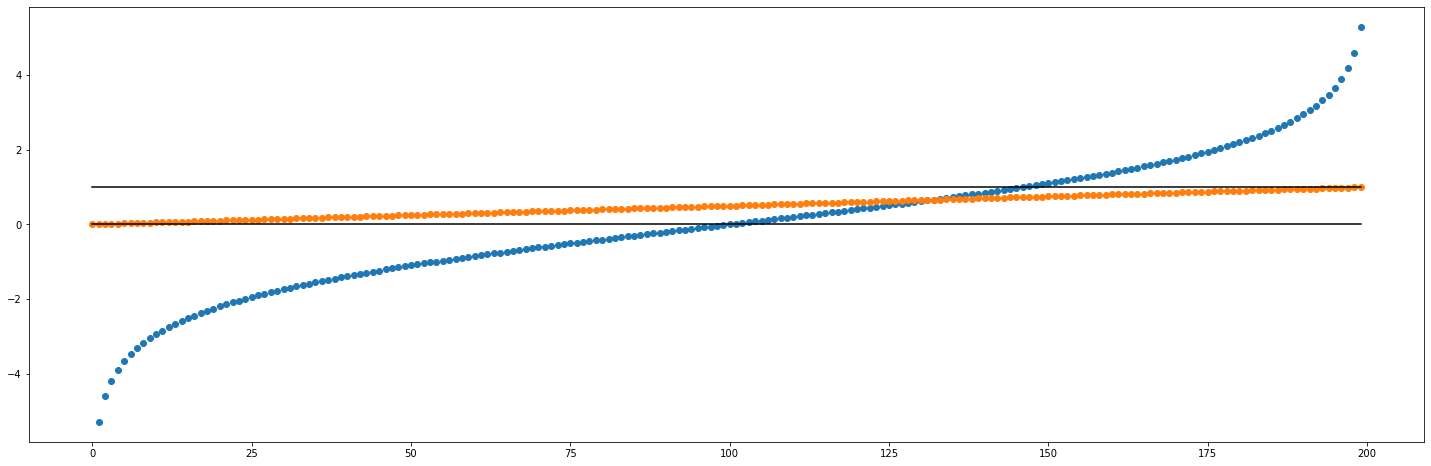

In [50]:
plt.figure(figsize = (25, 8))
plt.scatter(np.arange(200), logit(np.arange(0,1,1/200)))
plt.scatter(np.arange(200), np.arange(0,1, 1/200))
plt.plot(np.arange(200), [1] * 200, color = "black")
plt.plot(np.arange(200), [0] * 200, color = "black")
plt.show()

Next, we plot our logit function back by projecting the points onto a candidate line (A random line that we will optimise later). Then, the coordinates of those points are projected back into our initial $Y$.

<img src="logit_proj.png" alt="Drawing" style="width: 750px;"/>

**Formula for this:** \
$p$ = $\frac {e^{log(odds}} {1+e^{log(odds}}$

   where $log(odds) \equiv logit(p)$

**To derive this:** \
$log(\frac {p} {1-p}) = log(odds)$

$\frac p {1-p} = e^{log(odds)}$

$p = (1-p)E^{log(odds)}$

$p = e^{log(odds)} - pe^{log(odds)}$

$p+pe^{log(odds)}=e^{log(odds)}$

$p(1+e^{log(odds)})=e^{log(odds)}$

$p$ = $\frac {e^{log(odds}} {1+e^{log(odds}}$

We then evaluate this new curve, with each points $\hat Y_i$ aginst our initial actual value $Y_i$

### Data

we start with a 2D Model, using Total Time Spent on Website as an independent variable. 

### Implementation

Then similar to linear regression model, we have the equation

$Y_i$ = $\beta_0 + \beta_1 X_i + \mu_i$ 
We start with a 2D Model, using Total Time Spent on Website as an independent variable. 

Then similar to linear regression model, we have the equation

$Y_i$ = $\beta_0 + \beta_1 X_i + \mu_i$ 

In [65]:
df = pd.read_csv("leads.csv")

In [66]:
data = df[['Converted','Total Time Spent on Website']].rename(columns = {'Total Time Spent on Website': 'time_spent','Converted': 'converted'})

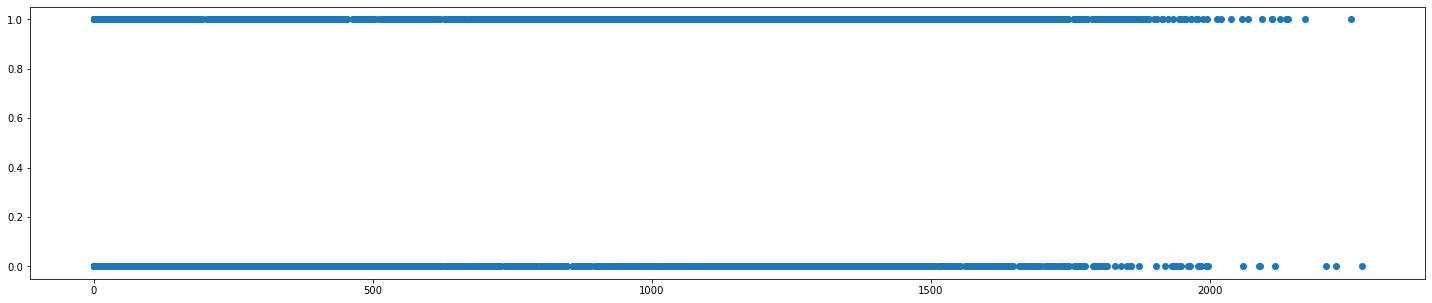

In [67]:
plt.figure(figsize = (25,5))
plt.scatter(data.time_spent, data.converted)